In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import nltk
import gdown

In [19]:
!gdown 1IoSOhGr9JdotSEs1PTcJvvyBlbpg8ghf

Downloading...
From: https://drive.google.com/uc?id=1IoSOhGr9JdotSEs1PTcJvvyBlbpg8ghf
To: /content/Reviews.csv
100% 301M/301M [00:01<00:00, 173MB/s]


In [20]:
df=pd.read_csv('Reviews.csv')

In [21]:
df.shape

(568454, 10)

In [22]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [24]:
# data preparation

In [25]:
df['HelpfulPercentage']=np.where(df.HelpfulnessDenominator>0,df.HelpfulnessNumerator/df.HelpfulnessDenominator,-1)

In [26]:
df.HelpfulPercentage

0         1.0
1        -1.0
2         1.0
3         1.0
4        -1.0
         ... 
568449   -1.0
568450   -1.0
568451    1.0
568452    1.0
568453   -1.0
Name: HelpfulPercentage, Length: 568454, dtype: float64

In [27]:
# assigning different labels to helpfulpercentage according to its value

In [28]:
df.HelpfulPercentage.unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [33]:
pd.cut(df.HelpfulPercentage,bins=[-1,0,0.2,0.4,0.6,0.8,1.0],labels=['Empty','0-20%','20=40%','40-60%','60-80%','80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: HelpfulPercentage, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20=40%' < '40-60%' < '60-80%' < '80-100%']

In [34]:
df['UpvotePercentage']=pd.cut(df.HelpfulPercentage,bins=[-1,0,0.2,0.4,0.6,0.8,1.0],labels=['Empty','0-20%','20=40%','40-60%','60-80%','80-100%'])

In [39]:
df.groupby(['Score','UpvotePercentage']).size()

Score  UpvotePercentage
1      Empty                 8060
       0-20%                 2338
       20=40%                4649
       40-60%                6586
       60-80%                5838
       80-100%              12531
2      Empty                 4234
       0-20%                  762
       20=40%                1618
       40-60%                3051
       60-80%                2486
       80-100%               7014
3      Empty                 5062
       0-20%                  474
       20=40%                1506
       40-60%                3384
       60-80%                2754
       80-100%              11037
4      Empty                 4780
       0-20%                  116
       20=40%                 909
       40-60%                3185
       60-80%                2941
       80-100%              26707
5      Empty                11638
       0-20%                  432
       20=40%                2275
       40-60%               10312
       60-80%           

In [41]:
df.groupby(['Score','UpvotePercentage']).agg({'Id':'count'}).reset_index()

,Score,UpvotePercentage,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20=40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20=40%,1618
9,2,40-60%,3051


In [42]:
df_s=df.groupby(['Score','UpvotePercentage']).agg({'Id':'count'}).reset_index()

In [43]:
# create pivot table for better conclusion

In [45]:
df.Score.unique()

array([5, 1, 4, 2, 3])

In [44]:
df_s.pivot(index='UpvotePercentage',columns='Score')

Id                            
Score                 1     2      3      4       5
UpvotePercentage                                   
Empty              8060  4234   5062   4780   11638
0-20%              2338   762    474    116     432
20=40%             4649  1618   1506    909    2275
40-60%             6586  3051   3384   3185   10312
60-80%             5838  2486   2754   2941   11060
80-100%           12531  7014  11037  26707  140661

In [46]:
# create heatmap for better visualisations

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'how helpful users find among user scores')

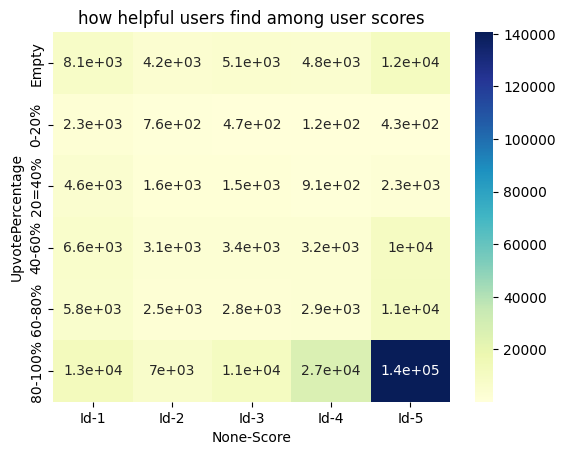

In [48]:
sns.heatmap(df_s.pivot(index='UpvotePercentage',columns='Score'),annot=True,cmap='YlGnBu')
plt.title('how helpful users find among user scores')

In [49]:
df.shape

(568454, 12)

In [50]:
df.Text

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [51]:
df2=df[df.Score!=3]
x=df2.Text
y_dict={1:0,2:0,4:1,5:1}
y=df2.Score.map(y_dict)

In [53]:
df2.Score

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 525814, dtype: int64

In [52]:
y

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

In [54]:
# convert the text into vector using nlp

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
c=CountVectorizer(stop_words='english')

In [58]:
x_c=c.fit_transform(x)

In [60]:
x_c

<525814x114969 sparse matrix of type '<class 'numpy.int64'>'
	with 15966096 stored elements in Compressed Sparse Row format>

In [61]:
print('features: {}'.format(x_c.shape[1]))

features: 114969


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_c,y)
print('train records: {}'.format(x_train.shape[0]))

train records: 394360


In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
log=LogisticRegression()

In [68]:
ml=log.fit(x_train,y_train)
acc=ml.score(x_test,y_test)
print('model acc: {}'.format(acc))

model acc: 0.9368220061770658


In [69]:
# fetch top 20 positive and top 20 negative words

In [76]:
w=c.get_feature_names_out()
w.flatten()

array(['00', '000', '0000', ..., 'être', 'île', 'ît'], dtype=object)

In [84]:
coef=ml.coef_.tolist()[0]
len(coef)
coef

[-0.28302809531703893,
 -0.05644748671005032,
 0.4790949797328912,
 -0.007210854306456095,
 0.002754085044175105,
 0.0,
 0.0,
 -0.013062740122823017,
 0.0004125452417389921,
 0.00035787244090803314,
 0.0016849025984407556,
 -0.009791140355214934,
 0.0,
 0.010090060386388341,
 -0.45646568677788735,
 0.0011249325732960377,
 0.001401693309849201,
 0.0033424210739858564,
 0.0014910475827119944,
 4.349537446148931e-05,
 0.10951169841242499,
 0.026693960278936436,
 0.03439365460988345,
 0.03439365460988345,
 0.03439365460988345,
 0.03439365460988345,
 0.03439365460988345,
 0.03439365460988345,
 0.03439365460988345,
 0.03439365460988345,
 0.03439365460988345,
 -0.0002660286663282746,
 0.06365318730941152,
 0.000128435829439368,
 0.0,
 -0.00047345460552327757,
 0.00013202407516526023,
 0.003081091767691264,
 0.13125234098677419,
 1.876218472750717e-05,
 -0.122260336620605,
 0.0,
 7.318722520180023e-05,
 0.0045869180742650305,
 -0.07746652205711052,
 0.0,
 0.0,
 3.073615236360871e-05,
 0.000128

In [85]:
coef_df=pd.DataFrame({'Word':w,'Coef':coef})
coef_df

,Word,Coef
0,00,-0.283028
1,000,-0.056447
2,0000,0.479095
3,000001,-0.007211
4,00001,0.002754
...,...,...
114964,çaykur,0.000737
114965,çelem,-0.149154
114966,être,0.020044
114967,île,0.011588


In [87]:
coef_df=coef_df.sort_values(['Coef','Word'],ascending=False)
coef_df

,Word,Coef
80600,pleasantly,4.331499
39072,downside,3.260500
5865,addicting,3.159483
94667,skeptical,2.993829
39214,drawback,2.875892
...,...,...
113164,worst,-3.260557
88945,ripoff,-3.309722
106852,unacceptable,-3.660480
34989,deceptive,-3.691124


In [92]:
print('top 20 positive')
print(coef_df.head(20).to_string(index=False))

top 20 positive
      Word     Coef
pleasantly 4.331499
  downside 3.260500
 addicting 3.159483
 skeptical 2.993829
  drawback 2.875892
    delish 2.600200
    resist 2.592152
   worries 2.505703
    brings 2.458939
    hooked 2.377094
   easiest 2.360185
   welcome 2.351080
    intend 2.260428
  soothing 2.233638
economical 2.208968
  tastiest 2.179732
      whim 2.133426
  hesitant 2.132995
  thankful 2.123210
dishwasher 2.073641


In [93]:
print('top 20 negative')
print(coef_df.tail(20).to_string(index=False))

top 20 negative
          Word      Coef
           ick -2.461860
      mediocre -2.482552
disappointment -2.523764
         ruins -2.570508
   unappealing -2.585621
       glowing -2.593602
    overpowers -2.600392
        lacked -2.612997
       defeats -2.671354
   disapointed -2.762479
   embarrassed -2.909319
         lousy -2.913952
 disappointing -3.155151
    returnable -3.181299
     cancelled -3.183267
         worst -3.260557
        ripoff -3.309722
  unacceptable -3.660480
     deceptive -3.691124
   undrinkable -4.169594


In [94]:
# create function to apply multiple nlp techniques and multiple ml agorithms to achieve best acc

In [105]:
def text_fit(x,y,nlp,ml,coef_show=1):
  x_c=nlp.fit_transform(x)
  print('features: {}'.format(x_c.shape[1]))
  x_train,x_test,y_train,y_test=train_test_split(x_c,y)
  print('train records: {}'.format(x_train.shape))
  print('test records: {}'.format(x_test.shape))
  ml=ml.fit(x_train,y_train)
  acc=ml.score(x_test,y_test)
  print('model acc: {}'.format(acc))

  if coef_show==1:
    w=nlp.get_feature_names_out()
    coef=ml.coef_.tolist()[0]
    coef_df=pd.DataFrame({'Word':w,'Coef':coef})
    coef_df=coef_df.sort_values(['Coef','Word'],ascending=[0,1])
    print('top 20 positive')
    print(coef_df.head(20).to_string(index=False))
    print('top 20 positive')
    print(coef_df.head(20).to_string(index=False))

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
c=CountVectorizer(stop_words='english')

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
text_fit(x,y,c,LogisticRegression())

features: 114969
train records: (394360, 114969)
test records: (131454, 114969)
model acc: 0.9367839700579671
top 20 positive
       Word     Coef
 pleasantly 3.955607
   downside 3.002392
  skeptical 3.001935
     resist 2.657959
  addicting 2.597845
    worries 2.448642
   hesitant 2.291897
     hooked 2.285251
     delish 2.282797
       whim 2.268992
   drawback 2.253113
   soothing 2.220488
      penny 2.154325
    martini 2.120410
    easiest 2.086616
  excellent 2.053667
   terrific 2.049652
exceptional 2.048776
      meets 2.027846
  delighted 2.015436
top 20 positive
       Word     Coef
 pleasantly 3.955607
   downside 3.002392
  skeptical 3.001935
     resist 2.657959
  addicting 2.597845
    worries 2.448642
   hesitant 2.291897
     hooked 2.285251
     delish 2.282797
       whim 2.268992
   drawback 2.253113
   soothing 2.220488
      penny 2.154325
    martini 2.120410
    easiest 2.086616
  excellent 2.053667
   terrific 2.049652
exceptional 2.048776
      meets 2.0278

In [ ]:
# define a predict function

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [110]:
def predict(x,y,nlp,ml):
  x_c=nlp.fit_transform(x)
  print('features: {}'.format(x_c.shape[1]))
  x_train,x_test,y_train,y_test=train_test_split(x_c,y)
  print('train records: {}'.format(x_train.shape[0]))
  print('test records: {}'.format(x_test.shape[0]))
  ml=ml.fit(x_train,y_train)
  pred=ml.predict(x_test)
  cm=confusion_matrix(pred,y_test)
  print(cm)
  acc=accuracy_score(pred,y_test)
  print(acc)

In [112]:
predict(x,y,c,LinearRegression())

features: 114969
train records: 394360
test records: 131454


NameError: ignored

In [115]:
# accuracy is around 93% but there are some coefficients that are not meaningful such as 280mg

In [116]:
from sklearn.dummy import DummyClassifier

In [117]:
text_fit(x,y,c,DummyClassifier(),0)

features: 114969
train records: (394360, 114969)
test records: (131454, 114969)
model acc: 0.8435270132517839


In [118]:
# logistic regression model on tf-idf

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
tfidf=TfidfVectorizer(stop_words='english')
text_fit(x,y,tfidf,LogisticRegression())

features: 114969
train records: (394360, 114969)
test records: (131454, 114969)
model acc: 0.9342279428545347
top 20 positive
      Word      Coef
     great 14.003884
 delicious 12.545388
      best 11.746854
   perfect 10.612885
     loves  9.763057
 excellent  9.677068
    highly  8.988994
      love  8.869530
 wonderful  8.327090
   amazing  7.808884
      good  7.636210
  favorite  7.515906
    hooked  7.500020
   awesome  7.354675
      nice  7.213208
pleasantly  7.210156
   pleased  6.722669
    smooth  6.545930
      glad  6.544748
      easy  6.457601
top 20 positive
      Word      Coef
     great 14.003884
 delicious 12.545388
      best 11.746854
   perfect 10.612885
     loves  9.763057
 excellent  9.677068
    highly  8.988994
      love  8.869530
 wonderful  8.327090
   amazing  7.808884
      good  7.636210
  favorite  7.515906
    hooked  7.500020
   awesome  7.354675
      nice  7.213208
pleasantly  7.210156
   pleased  6.722669
    smooth  6.545930
      glad  6.5447

In [121]:
predict(x,y,tfidf,LogisticRegression())

features: 114969
train records: 394360
test records: 131454
[[ 14174   2366]
 [  6218 108696]]
0.9346995907313584


In [122]:
# upvote prediction

In [123]:
data=df[df.Score==5]

In [124]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpfulPercentage', 'UpvotePercentage'],
      dtype='object')

In [125]:
data2=data[data.UpvotePercentage.isin(['0-20%','20-40%','60-80%','80-100%'])]
data2.shape

(152153, 12)

In [126]:
x=data2.Text

In [127]:
y_dict={'0-20%':0,'20-40%':0,'60-80%':1,'80-100%':1}
y=data2.UpvotePercentage.map(y_dict)

In [128]:
print(y.value_counts())

1.0    151721
0.0       432
Name: UpvotePercentage, dtype: int64


In [129]:
# the target class y is highly skewed, we will observe positive upvotes are too much higher than negative ones

In [130]:
tf=TfidfVectorizer()

In [132]:
x_c=tf.fit_transform(x)

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x_c,y,train_size=0.7)

In [134]:
y_test.value_counts()

1.0    45525
0.0      121
Name: UpvotePercentage, dtype: int64

In [135]:
from imblearn.over_sampling import RandomOverSampler

In [136]:
os=RandomOverSampler()

In [141]:
x_train_res,y_train_res=os.fit_resample(x_c,y)

In [142]:
x_train_res.shape,y_train_res.shape

((303442, 66711), (303442,))

In [143]:
from collections import Counter

In [145]:
print('original dataset shape: {}'.format(Counter(y)))
print('resampled dataset shape: {}'.format(Counter(y_train_res)))

original dataset shape: Counter({1.0: 151721, 0.0: 432})
resampled dataset shape: Counter({1.0: 151721, 0.0: 151721})


In [146]:
log_class=LogisticRegression()

In [147]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [150]:
y_pred=clf.predict(x_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[  121     2]
 [    0 45523]]
0.9999561845506726
